# LeNet5

[LeNet Wikipedia](https://en.wikipedia.org/wiki/LeNet#:~:text=LeNet%2D5%20was%20one%20of,Yann%20LeCun%20in%202018)  
[LeNet5 Architecture Explained](https://medium.com/@siddheshb008/lenet-5-architecture-explained-3b559cb2d52b)

Reference: [Datasets and Dataloaders](https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html#datasets-and-dataloaders)

In [5]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

Next, we’ll create an instance of the CIFAR10 dataset. This is a set of 32x32 color image tiles representing 10 classes of objects: 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane, automobile, ship, truck):

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

Visualize the data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  car truck  bird plane


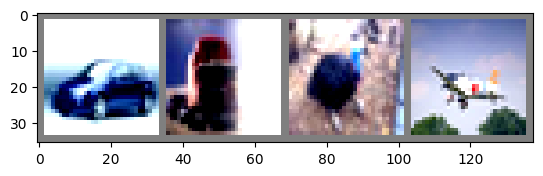

In [9]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Training your PyTorch Model

Reference: [Training Your PyTorch Model](https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html#training-your-pytorch-model)

In [10]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

This is the model we will train. It's a variant of LeNet.

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

We need to add the loss function and optimizer

The loss function is a measure of how far from our ideal output the model's prediction was. Cross-entropy loss is a typical loss function for classification models like ours.

The **Optimizer** is what drives the learning. Here we have created an optimizer that implements **stochastic gradient descent**, one of the more straightforward optimization algorithms.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)